# Credit Card Fraud Detection (신용카드 사기 탐지)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
%matplotlib inline
pd.options.display.max_rows = 20
sns.set(style='whitegrid', palette='pastel', font_scale=1, rc={'font.family':'NanumGothic'})

## 1. Import Dataset

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

null 값이 존재하는 feature는 없다.

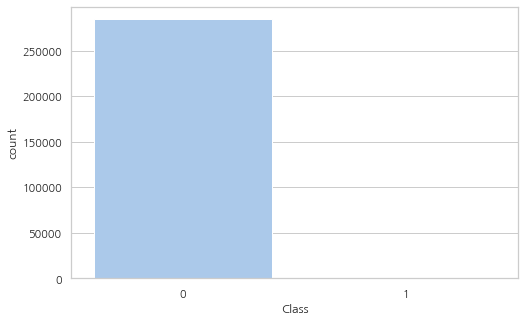

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(df['Class'])

1이 거의 안보일정도.. 클래스 불균형(Class Imbalance)이 심한 데이터이다.

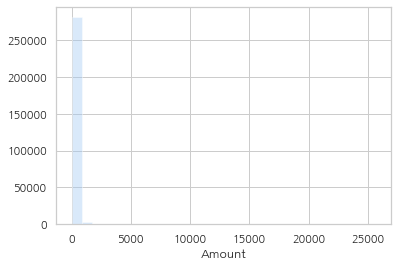

In [5]:
sns.distplot(df['Amount'], kde=False, bins=30)

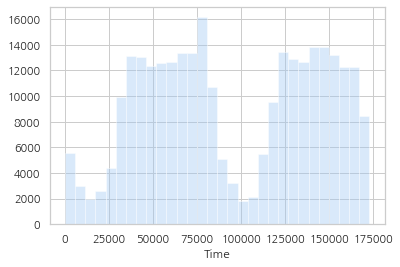

In [6]:
sns.distplot(df['Time'], kde=False, bins=30)

## 3. Model Training

In [7]:
# class 변수 제외한 나머지 values
X = df.iloc[:,:-1].values
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [8]:
# class 변수
y = df.iloc[:,-1].values
print(y)

[0 0 0 ... 0 0 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227845, 30) (56962, 30)
(227845,) (56962,)


In [10]:
# 변수 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Logistic Regression (로지스틱 회귀)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

[[56852     9]
 [   37    64]]


0.9991924440855307

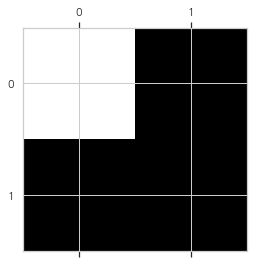

In [12]:
y_pred = lr.predict(X_test)
lr_conf = confusion_matrix(y_test, y_pred)
print(lr_conf)
plt.matshow(lr_conf, cmap=plt.cm.gray)
accuracy_score(y_test, y_pred)

Logistic Regression의 분류 성능은 99%로 매우 우수한 편이다.  
하지만, 클래스 불균형이 심해서 모델이 전부 class 0으로 예측해도 99%가 나올 수 있다.  
클래스 불균형 문제를 해결해야할 듯!

### K-Fold Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f}%'.format(accuracies.std()*100))

Accuracy: 99.92%
Standard deviation: 0.02%
